In [1]:
import pandas as pd
# import modin.pandas as mpd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# import geopandas as gpd

# from scipy import ndimage

# import contextily as cx

# import matplotlib.pylab as pylab
# import matplotlib

from shapely.geometry import Point
from shapely.geometry import LineString

from myutils.map_utils import generate_3857_df, generate_lines,\
                            generate_buffers,generate_base_length\

from myutils.routine_utils import generate_routine, generate_adjusted_geometry,\
                                generate_belonging_relations, \
                                generate_cum_length, generate_correct_geometry,\
                                generate_station_status\
                                    ,generate_interpolation
            
from myutils.time_utils import time_transfer
import warnings
warnings.filterwarnings("ignore")

In [4]:
gps = pd.read_csv('./data/gps/gps_0907.csv')
gps = time_transfer(gps)
gps = generate_3857_df(gps)

In [5]:
gps.time.min(), gps.time.max() 

(Timestamp('2021-09-07 04:53:59'), Timestamp('2021-09-07 22:53:58'))

In [3]:
gps.loc[gps['deadheading']==1].groupby(['nidx', 'direction']).agg('count')

vid  time  lon  lat  deadheading  month  day  geometry
nidx direction                                                        
1    0          207   207  207  207          207    207  207       207
10   0          178   178  178  178          178    178  178       178
15   0          101   101  101  101          101    101  101       101
     1          530   530  530  530          530    530  530       530
55   1          383   383  383  383          383    383  383       383
84   1          202   202  202  202          202    202  202       202
101  0          318   318  318  318          318    318  318       318
102  0          360   360  360  360          360    360  360       360
103  0          366   366  366  366          366    366  366       366

In [36]:
mapdf = pd.read_excel('./data/map/map_up.xlsx')
# mapdf = pd.read_excel('./data/map/map_down.xlsx')
mapdf = generate_3857_df(mapdf)

mapline = generate_lines(mapdf)
mapline = generate_buffers(mapline)
mapline = generate_base_length(mapline)

generate_3857_df:   0%|          | 0/85 [00:00<?, ?it/s]

In [37]:
routine = generate_routine(gps, 0, 0)

In [38]:
og_routine = generate_belonging_relations(routine, mapline)
routine = og_routine.copy(deep=True)
routine = generate_adjusted_geometry(routine)
routine = generate_cum_length(routine, mapline)
routine = generate_correct_geometry(routine)

In [39]:
len(routine), len(routine.loc[routine['diff_distance']<0])

(299, 0)

In [40]:
routine = generate_interpolation(routine, mapline)

299
444
592
606
615
632
643


In [41]:
routine.columns

Index(['vid', 'time', 'lon', 'lat', 'direction', 'nidx', 'deadheading',
       'month', 'day', 'geometry', 'belong_rect_buffer', 'belong_circ_buffer',
       'belong_line', 'belong_line_idx', 'selected_line', 'selected_line_idx',
       'adjusted_geometry', 'base_length', 'end_length', 'start_is_station',
       'end_is_station', 'start', 'end', 'cur_length', 'cum_length',
       'diff_distance', 'diff_time', 'velocity'],
      dtype='object')

In [42]:
routine.selected_line_idx

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
632    83.0
633    83.0
634    83.0
635    83.0
636    83.0
Name: selected_line_idx, Length: 637, dtype: object

In [43]:

routine = generate_station_status(routine)
routine

,vid,time,lon,lat,direction,nidx,deadheading,month,day,geometry,...,start_is_station,end_is_station,start,end,cur_length,cum_length,diff_distance,diff_time,velocity,station_status
0,4,2021-09-06 05:53:34,121.250374,31.407167,0,0,0,9,6,POINT (13497529.892173976 3685741.1931776726),...,True,False,菊园车站,交叉口0,51.356943,51.356943,NaN,NaN,0.0,菊园车站
1,4,2021-09-06 05:53:55,121.25029,31.407043,0,0,0,9,6,POINT (13497520.541336752 3685725.0199611178),...,True,False,菊园车站,交叉口0,55.632837,55.632837,4.275894,21.0,0.211155,菊园车站
2,4,2021-09-06 05:54:15,121.25029,31.407043,0,0,0,9,6,POINT (13497520.541336752 3685725.0199611178),...,True,False,菊园车站,交叉口0,59.908731,59.908731,4.275894,20.0,0.211155,菊园车站
3,4,2021-09-06 05:54:35,121.25029,31.407043,0,0,0,9,6,POINT (13497520.541336752 3685725.0199611178),...,True,False,菊园车站,交叉口0,64.184625,64.184625,4.275894,20.0,0.211155,菊园车站
4,4,2021-09-06 05:54:55,121.25029,31.407043,0,0,0,9,6,POINT (13497520.541336752 3685725.0199611178),...,True,False,菊园车站,交叉口0,68.460519,68.460519,4.275894,20.0,0.211155,菊园车站
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,4,2021-09-06 07:07:18,121.250336,31.331903,0,0,0,9,6,POINT (13497525.662033327 3675928.4977637003),...,False,True,交叉口55,公交嘉定新城站,214.045427,17322.147865,40.397273,5.0,8.079455,公交嘉定新城站
633,4,2021-09-06 07:07:23,121.25005,31.332483,0,0,0,9,6,POINT (13497493.82465896 3676004.0864020493),...,False,True,交叉口55,公交嘉定新城站,254.966121,17363.068559,40.920694,5.0,8.184139,公交嘉定新城站
634,4,2021-09-06 07:07:28,121.25005,31.332483,0,0,0,9,6,POINT (13497493.82465896 3676004.0864020493),...,False,True,交叉口55,公交嘉定新城站,295.886815,17403.989253,40.920694,5.0,8.184139,公交嘉定新城站
635,4,2021-09-06 07:07:38,121.250015,31.332767,0,0,0,9,6,POINT (13497489.928476783 3676041.098939685),...,False,True,交叉口55,公交嘉定新城站,330.72146,17438.823898,34.834645,10.0,3.483464,公交嘉定新城站


In [44]:
station_time_res = routine.loc[routine['station_status'] != 0, ['time','cum_length', 'station_status']].groupby('station_status').agg('mean').sort_values('time')
station_time_res

,time,cum_length
station_status,,
菊园车站,2021-09-06 06:03:02.074074112,96.873790
嘉行公路平城路,2021-09-06 06:12:21.000000000,696.325612
菊园新村,2021-09-06 06:14:47.666666752,1385.154472
环城路嘉行公路,2021-09-06 06:16:25.666666496,1884.942790
环城路北大街,2021-09-06 06:17:44.000000000,2431.977592
平城路陈家山路,2021-09-06 06:20:03.000000000,2955.257705
平城路城北路,2021-09-06 06:22:34.000000000,3699.326734
嘉定中心医院,2021-09-06 06:26:30.500000000,4668.932773
嘉定工业学校,2021-09-06 06:27:08.000000000,5093.531784


In [45]:
len(station_time_res)

28

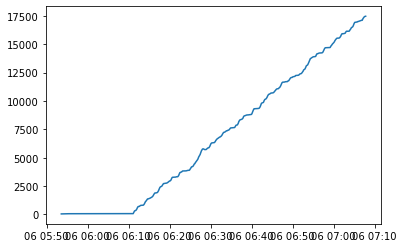

In [46]:
plt.plot(routine['time'], routine['cum_length'])

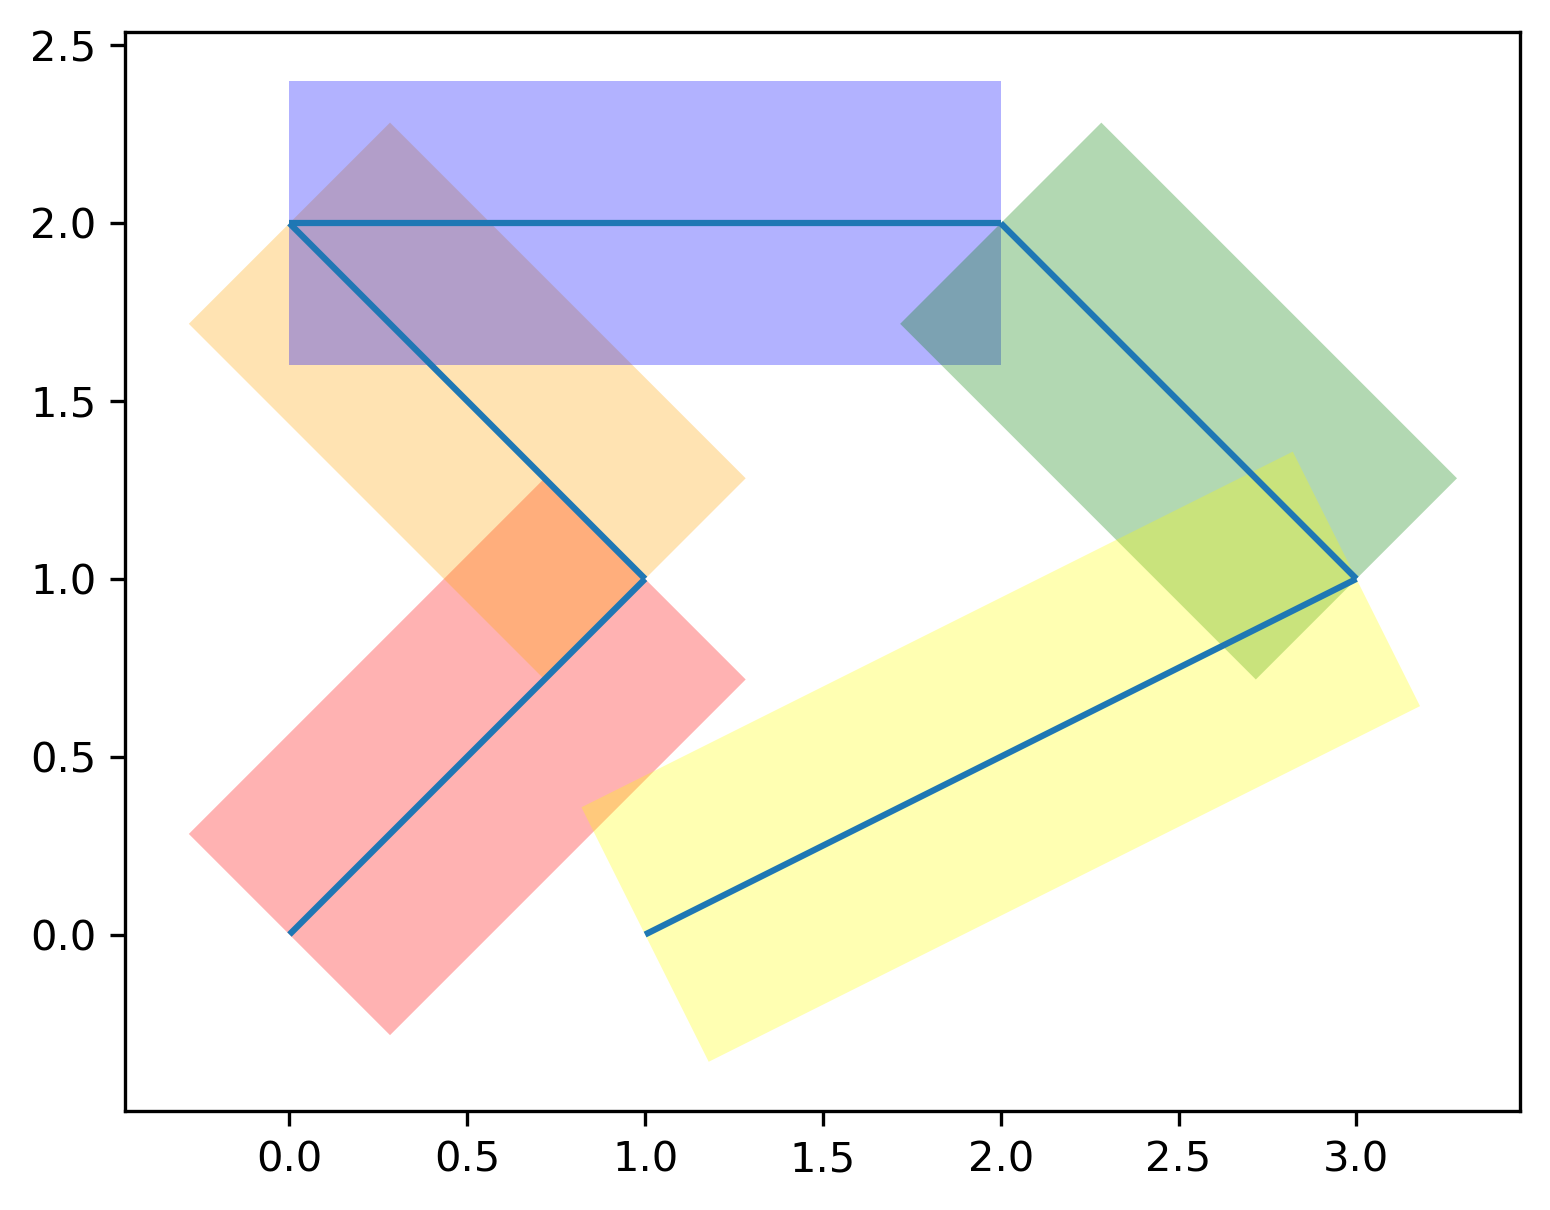

In [47]:
import geopandas as gpd
# testline = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
testlines = gpd.GeoSeries([LineString([(0, 0), (1, 1)]),
                            LineString([(1, 1), (0, 2)]),
                            LineString([(0, 2), (2, 2)]),
                            LineString([(2, 2), (3, 1)]),
                            LineString([(3, 1), (1, 0)])])
testbuffer = testlines.buffer(0.4, cap_style=2, join_style=2)
fig, ax = plt.subplots(figsize=(6,6),dpi=300)
gpd.GeoSeries(testlines).plot(ax = ax)
color = ['red','orange','blue','green','yellow']
for i in range(len(testbuffer)):
    gpd.GeoSeries(testbuffer[i]).plot(ax = ax, color = color[i], alpha=0.3)

<AxesSubplot:>

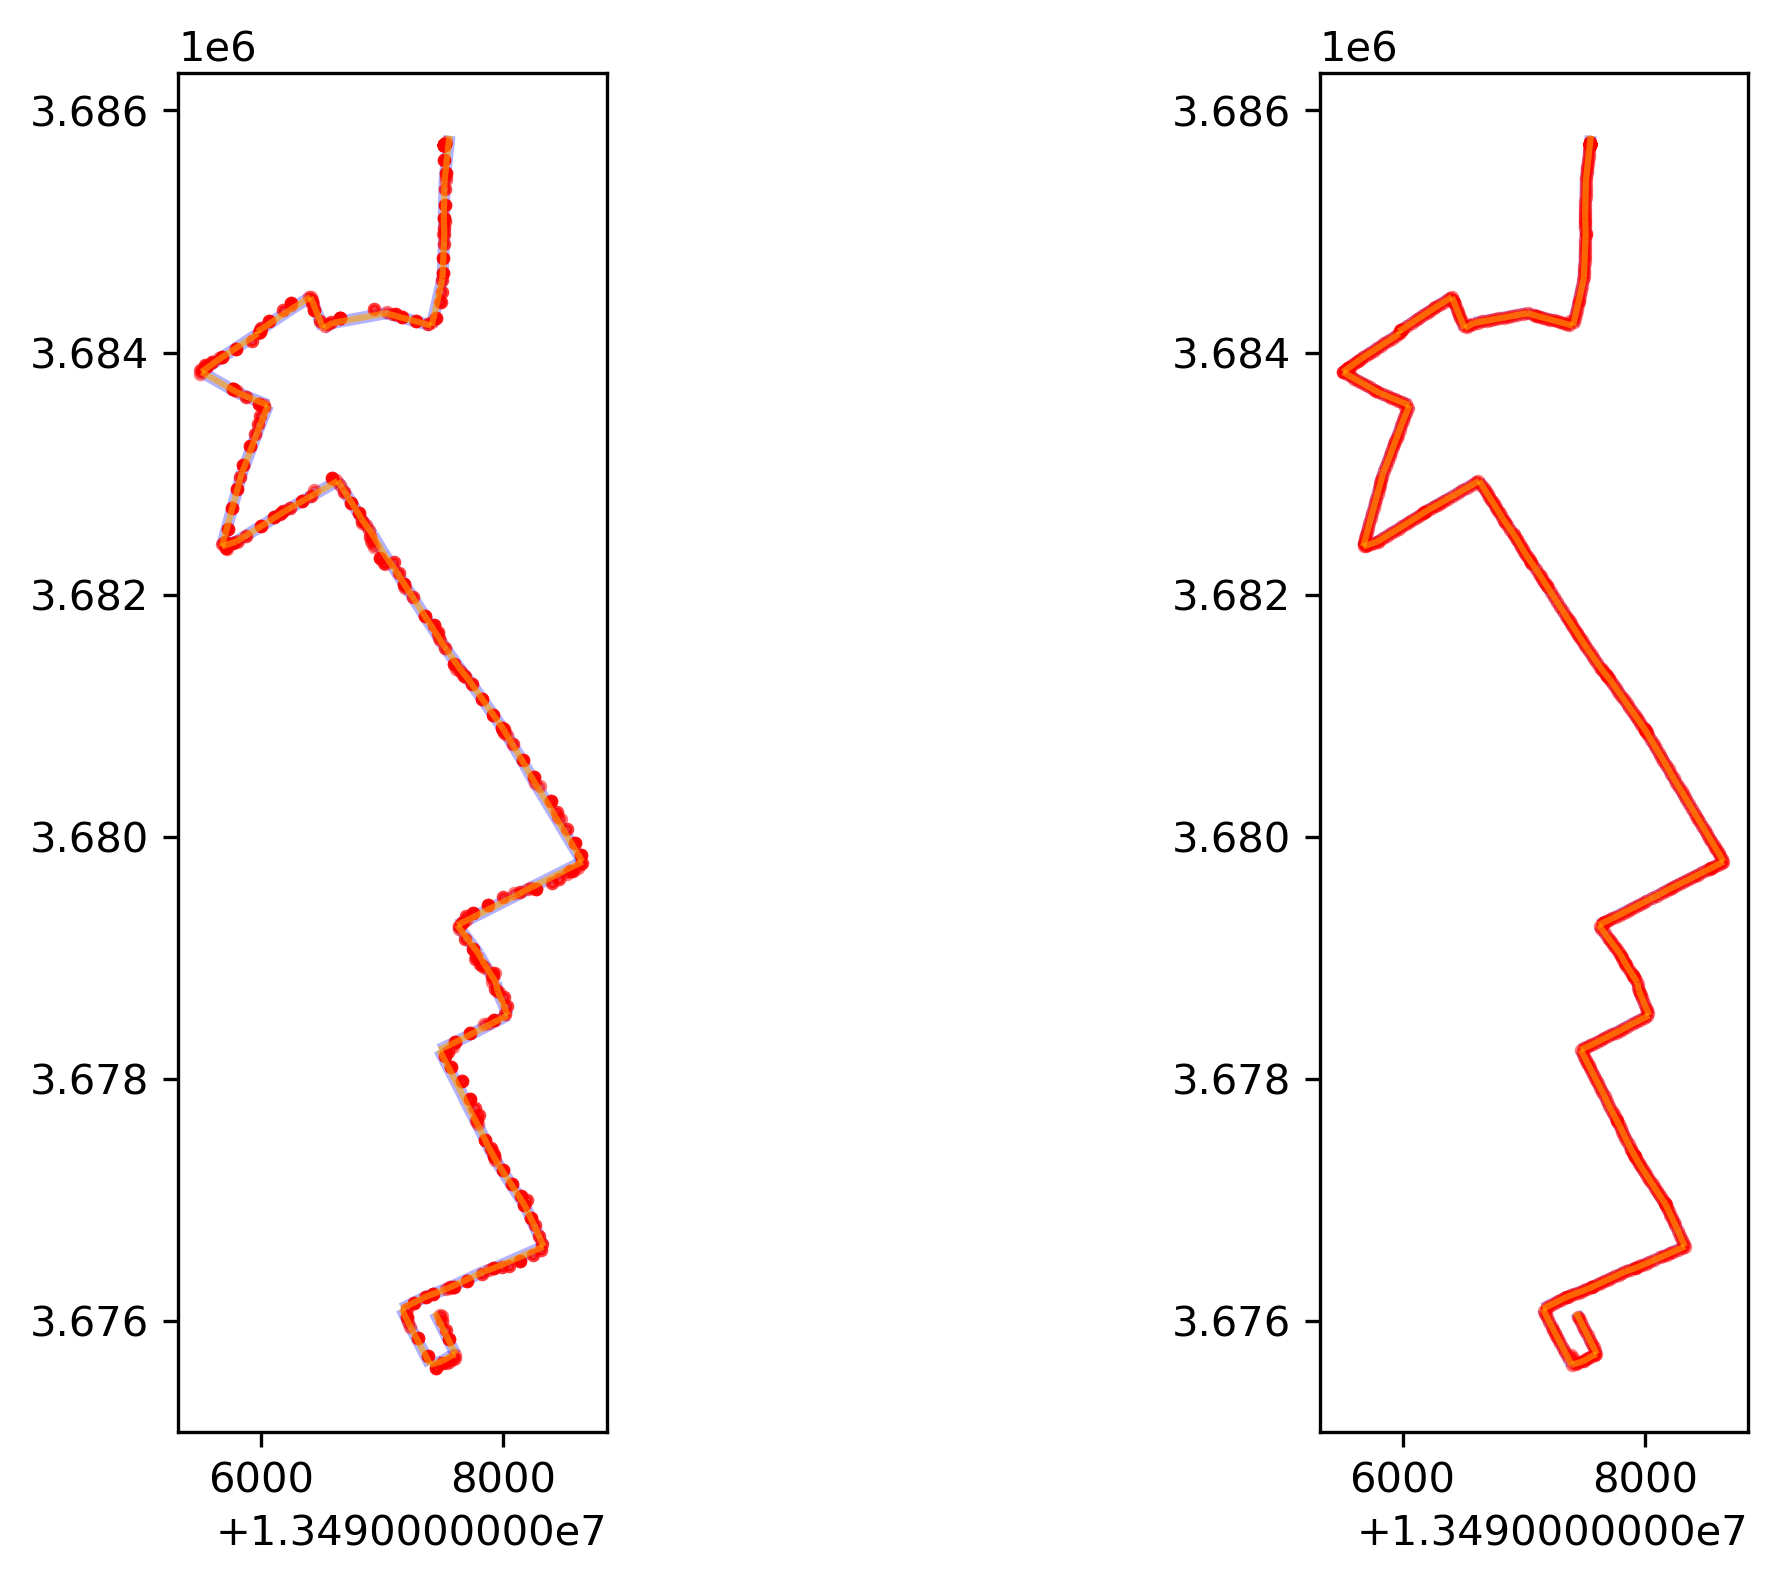

In [48]:
import geopandas as gpd
plt_mapline = gpd.GeoDataFrame(mapline)
plt_routine = gpd.GeoDataFrame(routine)
fig, ax = plt.subplots(1,2,figsize=(9,6),dpi=300)
plt_mapline['rect_buffer'].plot(ax = ax[0], color = 'blue', alpha=0.3)
plt_mapline.plot(ax = ax[0], color = 'orange',alpha=0.6)
plt_routine.plot(ax = ax[0], color = 'red', alpha = 0.5, markersize = 5)

# ax[0].set_xlim((5400+1.349e7, 6500+1.349e7))
# ax[0].set_ylim((3.6822e6, 3.684e6))
# ax[0].set_xlim((7000+1.349e7, 8000+1.349e7))
# ax[0].set_ylim((3.685e6, 3.686e6))

plt_mapline['rect_buffer'].plot(ax = ax[1], color = 'blue', alpha=0.3)
plt_mapline.plot(ax = ax[1], color = 'orange',alpha=0.6)
adjusted_routine = gpd.GeoDataFrame({'geometry':plt_routine['adjusted_geometry']})
adjusted_routine.plot(ax = ax[1], color = 'red', alpha = 0.5, markersize = 5)


# ax[1].set_xlim((5400+1.349e7, 6500+1.349e7))
# ax[1].set_ylim((3.6822e6, 3.684e6))
# ax[1].set_xlim((7000+1.349e7, 8000+1.349e7))
# ax[1].set_ylim((3.685e6, 3.686e6))

# mapline['rect_buffer'].plot(ax = ax[2], color = 'blue', alpha=0.3)
# mapline.plot(ax = ax[2], color = 'orange',alpha=0.6)
# adjusted_routine = gpd.GeoDataFrame({'geometry':test_routine['adjusted_geometry']})
# adjusted_routine.plot(ax = ax[2], color = 'red', alpha = 0.5, markersize = 5)
# # routine['adjusted_geometry'].plot(ax = ax[1], color = 'red', alpha = 0.5, markersize = 5)

# # ax[1].set_xlim((5400+1.349e7, 6500+1.349e7))
# # ax[1].set_ylim((3.6822e6, 3.684e6))
# ax[2].set_xlim((7000+1.349e7, 8000+1.349e7))
# ax[2].set_ylim((3.685e6, 3.686e6))

# ax[0].set_xlim((7800+1.349e7, 9000+1.349e7))
# ax[0].set_ylim((3.679e6, 3.682e6))
# ax[1].set_xlim((7800+1.349e7, 9000+1.349e7))
# ax[1].set_ylim((3.679e6, 3.682e6))


In [49]:
370
371
372
373
374

374

In [50]:
from shapely import geometry as geo
def check(idx_list):
    res = []
    for idx in idx_list:
        buffer = routine.loc[idx, 'belong_rect_buffer'][0]
        line = routine.loc[idx, 'selected_line']
        point = routine.loc[idx, 'adjusted_geometry']
        res += [buffer,line,point]
    return res
    

In [ ]:
geo.GeometryCollection(check([169, 170, 171, 173]))

In [ ]:
buffer = routine.loc[2, 'belong_rect_buffer'][0]
line = routine.loc[2, 'selected_line']
point = routine.loc[2, 'adjusted_geometry']
from shapely import geometry as geo
geo.GeometryCollection([buffer,line,point])

In [ ]:
mapdf

In [ ]:
mapline

In [ ]:
mapline

,name,geometry,start,end,start_is_station,end_is_station,circ_buffer,rect_buffer,end_length,base_length
0,公交嘉定新城站-交叉口0,"LINESTRING (13497418.239 3676110.042, 13497423...",公交嘉定新城站,交叉口0,True,False,"POLYGON ((13497472.207 3676094.588, 13497472.9...","POLYGON ((13497472.207 3676094.588, 13497374.0...",25.523172,0.000000
1,交叉口0-交叉口1,"LINESTRING (13497423.137 3676084.993, 13497578...",交叉口0,交叉口1,False,False,"POLYGON ((13497552.647 3676219.269, 13497556.9...","POLYGON ((13497552.647 3676219.269, 13497603.3...",179.730418,25.523172
2,交叉口1-交叉口2,"LINESTRING (13497578.016 3676176.183, 13497768...",交叉口1,交叉口2,False,False,"POLYGON ((13497813.081 3675822.569, 13497815.0...","POLYGON ((13497813.081 3675822.569, 13497723.8...",421.661292,205.253589
3,交叉口2-交叉口3,"LINESTRING (13497768.472 3675799.985, 13497605...",交叉口2,交叉口3,False,False,"POLYGON ((13497625.118 3675683.073, 13497620.5...","POLYGON ((13497625.118 3675683.073, 13497585.2...",178.098314,626.914881
4,交叉口3-交叉口4,"LINESTRING (13497605.166 3675728.920, 13497575...",交叉口3,交叉口4,False,False,"POLYGON ((13497590.984 3675671.693, 13497586.2...","POLYGON ((13497590.984 3675671.693, 13497559.9...",31.242678,805.013196
...,...,...,...,...,...,...,...,...,...,...
83,菊园新村-交叉口57,"LINESTRING (13497461.876 3684422.494, 13497496...",菊园新村,交叉口57,True,False,"POLYGON ((13497447.721 3684622.058, 13497448.8...","POLYGON ((13497447.721 3684622.058, 13497546.0...",193.716993,16737.207632
84,交叉口57-嘉行公路平城路,"LINESTRING (13497496.897 3684613.019, 13497519...",交叉口57,嘉行公路平城路,False,True,"POLYGON ((13497469.795 3684915.618, 13497470.4...","POLYGON ((13497469.795 3684915.618, 13497569.5...",299.667656,16930.924625
85,嘉行公路平城路-交叉口58,"LINESTRING (13497519.651 3684911.822, 13497512...",嘉行公路平城路,交叉口58,True,False,"POLYGON ((13497462.520 3684973.303, 13497462.2...","POLYGON ((13497462.520 3684973.303, 13497561.9...",67.408563,17230.592282
86,交叉口58-交叉口59,"LINESTRING (13497512.215 3684978.819, 13497513...",交叉口58,交叉口59,False,False,"POLYGON ((13497463.707 3685418.672, 13497463.9...","POLYGON ((13497463.707 3685418.672, 13497563.7...",439.686136,17298.000845


In [ ]:
print(routine[['time','base_length', 'cum_length', 'end_length','start','end']])

                   time   base_length    cum_length  end_length  start    end
0   2021-09-06 12:54:19     25.523172     40.804717  179.730418   交叉口0   交叉口1
1   2021-09-06 12:54:22     25.523172     40.804717  179.730418   交叉口0   交叉口1
2   2021-09-06 12:54:42     25.523172     46.983946  179.730418   交叉口0   交叉口1
3   2021-09-06 12:54:52     25.523172     69.581619  179.730418   交叉口0   交叉口1
4   2021-09-06 12:55:02     25.523172     85.327552  179.730418   交叉口0   交叉口1
..                  ...           ...           ...         ...    ...    ...
715 2021-09-06 14:16:11  17298.000845  17702.117221  439.686136  交叉口58  交叉口59
716 2021-09-06 14:16:21  17298.000845  17702.117221  439.686136  交叉口58  交叉口59
717 2021-09-06 14:16:31  17298.000845  17714.120074  439.686136  交叉口58  交叉口59
718 2021-09-06 14:16:36  17298.000845  17756.445171  439.686136  交叉口58  交叉口59
719 2021-09-06 14:16:41   17737.68698  17798.770268  375.649536  交叉口59   菊园车站

[720 rows x 6 columns]
